In [9]:
import numpy as np

def generate_Cp(coefficients):
    n = len(coefficients)
    Cp = np.zeros((n, n))
    Cp[range(1, n), range(n-1)] = 1
    Cp[:, n-1] = -np.array(coefficients)
    
    return Cp

def wilkinson_shift(A):
    """Compute the Wilkinson shift for the QR algorithm."""
    n = A.shape[0]
    if n < 2:
        return A[-1, -1]
    d = (A[n-2, n-2] - A[n-1, n-1]) / 2
    b = A[n-1, n-2]**2
    mu = A[n-1, n-1] + d - np.sign(d) * np.sqrt(d**2 + b)
    return mu

def qr_algorithm_with_wilkinson_shift(Cp, max_iterations=1000, tol=1e-12):
    n = Cp.shape[0]
    A = Cp.copy()
    eigenvalues = []

    for k in range(n, 0, -1):
        for _ in range(max_iterations):
            # Use Wilkinson shift
            mu = wilkinson_shift(A[:k, :k])

            # Perform QR decomposition with shift
            Q, R = np.linalg.qr(A[:k, :k] - mu * np.eye(k))
            A[:k, :k] = R @ Q + mu * np.eye(k)

            # Convergence check
            if np.linalg.norm(A[k-1, :k-1]) < tol:
                eigenvalues.append(A[k-1, k-1])
                break

        # Deflate the matrix
        if k > 1:
            A = A[:k-1, :k-1]

    return np.array(sorted(eigenvalues))

### (b)

In [11]:
coefficients = [1, -324, 7175, 8100, -180000]
Cp = generate_Cp(coefficients)
eigenvalues = qr_algorithm_with_wilkinson_shift(Cp)
print("Eigenvalues:", eigenvalues)


Eigenvalues: [-1.99999910e-01  3.33333336e-03  4.16666662e-02  2.00000143e-01
  1.79999955e+05]


In [12]:
coefficients = [1, -167, 10081, -251447, 1676815, 17367175, -66421125, -352378125, 454612500, 1949062500, 0]
Cp = generate_Cp(coefficients)
eigenvalues = qr_algorithm_with_wilkinson_shift(Cp)
print("Eigenvalues:", eigenvalues)


Eigenvalues: [-3.33355829e-01 -3.33310841e-01 -2.00000000e-01  1.81818182e-02
  2.00000000e-02  2.85714286e-02  3.33333333e-02  2.00000000e-01
  3.33333333e-01  4.24220041e+04]


### (c)

Sorted roots of modified p(x) = x^4 - 324x^3 + 7225x^2 - 8100x + 180000:
[-1.80000045e+05 -8.58329747e-02  3.33333331e-03  4.16666662e-02]


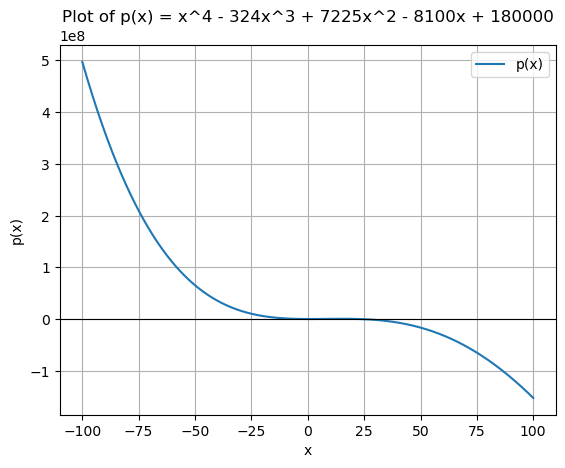

In [14]:
import numpy as np
import matplotlib.pyplot as plt

coefficients_p = [1, -324, 7225, -8100, 180000]
Cp = generate_Cp(coefficients_p)
roots_p = qr_algorithm_with_wilkinson_shift(Cp)
print("Sorted roots of modified p(x) = x^4 - 324x^3 + 7225x^2 - 8100x + 180000:")
print(roots_p)

# Plot the polynomial for visual analysis
x = np.linspace(-100, 100, 1000)
y = x**4 - 324*x**3 + 7225*x**2 - 8100*x + 180000
plt.plot(x, y, label='p(x)')
plt.axhline(0, color='black', linewidth=0.8)
plt.title('Plot of p(x) = x^4 - 324x^3 + 7225x^2 - 8100x + 180000')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.grid(True)
plt.legend()
plt.show()
